# Task 2 NER 

In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from langdetect import detect
import seaborn as sns

data = load_dataset('argilla/medical-domain')['train']
df = data.to_pandas()

df['label'] = df.prediction.apply(lambda x: x[0]['label'])



df['language'] = df['text'].apply(lambda x: detect(x))
unique_languages = df['language'].unique()

english_texts = df[df['language'] == 'en']

df['text'].head()

/Users/joseph.weibel@fhnw.ch/.local/share/virtualenvs/Natural_Language_Processing-8K8Or-MM/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0    PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...
1    CLINICAL INDICATION:  ,Normal stress test.,PRO...
2    FINDINGS:,Axial scans were performed from L1 t...
3    PREOPERATIVE DIAGNOSIS: , Blood loss anemia.,P...
4    REASON FOR VISIT:  ,Elevated PSA with nocturia...
Name: text, dtype: object

In [3]:
print(english_texts['text'].sample(5).to_string(index=False))

CHIEF COMPLAINT:,  Right ear pain with drainage...
PREOPERATIVE DIAGNOSIS: , Recurrent vulvar mela...
INDICATION: , Chest pain.,TYPE OF TEST: , Adeno...
PREOPERATIVE DIAGNOSES:,1.  Clinical stage T2, ...
EXAM: , Digital screening mammogram.,HISTORY:, ...


In [6]:
import spacy

nlp = spacy.load("en_core_web_sm")

def get_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df_sample = df.sample(100)
df_sample['entities'] = df_sample['text'].apply(get_entities)

print(df_sample[['text', 'entities']].head())

                                                   text  \
3883  PREOPERATIVE DIAGNOSES:,1.  Bunion left foot.,...   
3397  PREOPERATIVE DIAGNOSIS: , Microscopic hematuri...   
106   XYZ, M.D. ,Suite 123, ABC Avenue ,City, STATE ...   
864   PROCEDURES PERFORMED:,  Colonoscopy.,INDICATIO...   
4688  Thereafter, he was evaluated and it was felt t...   

                                               entities  
3883  [(second, ORDINAL), (second, ORDINAL), (Arthro...  
3397  [(Microscopic hematuria, PERSON), (Microscopic...  
106   [(XYZ, GPE), (123, CARDINAL), (ABC Avenue, FAC...  
864   [(Inflammatory Bowel Disease, ORG), (Informed,...  
4688  [(December 5, 2008, DATE), (XXXX, PERSON), (X....  


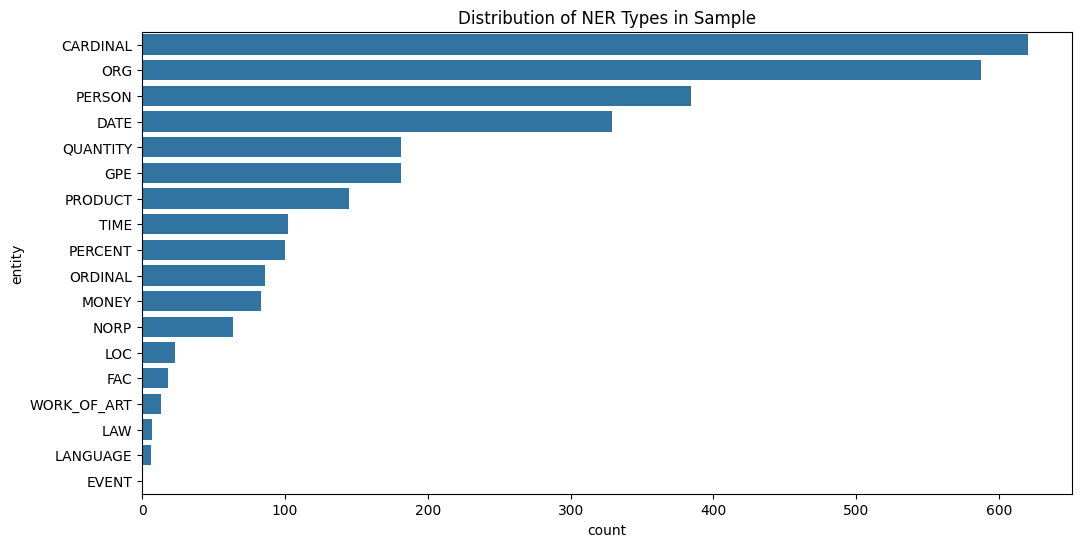

In [7]:
all_entities = [ent[1] for sublist in df_sample['entities'].tolist() for ent in sublist]


entity_df = pd.DataFrame(all_entities, columns=['entity'])


plt.figure(figsize=(12, 6))
sns.countplot(y='entity', data=entity_df, order=entity_df['entity'].value_counts().index)
plt.title('Distribution of NER Types in Sample')
plt.show()

In [9]:
from spacy import displacy

text = df_sample['text'].iloc[0]
doc = nlp(text)

displacy.serve(doc, style='ent', port=6192)

/Users/joseph.weibel@fhnw.ch/.local/share/virtualenvs/Natural_Language_Processing-8K8Or-MM/lib/python3.11/site-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:6192 ...



127.0.0.1 - - [06/Nov/2023 10:06:18] "GET / HTTP/1.1" 200 20231
127.0.0.1 - - [06/Nov/2023 10:06:19] "GET /favicon.ico HTTP/1.1" 200 20231


Shutting down server on port 6192.
